# K-means Clustering

### Import resources and display image

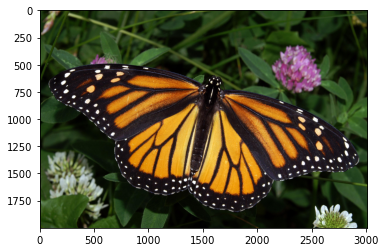

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [2]:
image

array([[[33, 66, 23],
        [33, 66, 23],
        [33, 66, 23],
        ...,
        [28, 46, 20],
        [29, 47, 21],
        [29, 47, 21]],

       [[33, 66, 23],
        [33, 66, 23],
        [33, 66, 23],
        ...,
        [28, 46, 20],
        [28, 46, 20],
        [28, 46, 20]],

       [[33, 66, 23],
        [33, 66, 23],
        [33, 66, 23],
        ...,
        [26, 46, 19],
        [26, 46, 19],
        [26, 46, 19]],

       ...,

       [[38, 70, 20],
        [37, 69, 19],
        [37, 69, 19],
        ...,
        [25, 46, 13],
        [26, 45, 13],
        [26, 45, 13]],

       [[39, 71, 21],
        [39, 71, 21],
        [38, 70, 20],
        ...,
        [24, 45, 12],
        [25, 44, 12],
        [25, 44, 12]],

       [[40, 72, 22],
        [39, 71, 21],
        [39, 71, 21],
        ...,
        [24, 43, 11],
        [24, 43, 11],
        [24, 43, 11]]], dtype=uint8)

### Prepare data for k-means

In [3]:
# Reshape image into a 2D array of number of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1, 3))


In [4]:
pixel_vals


array([[33, 66, 23],
       [33, 66, 23],
       [33, 66, 23],
       ...,
       [24, 43, 11],
       [24, 43, 11],
       [24, 43, 11]], dtype=uint8)

In [5]:
# Convert to float type
pixel_vals = np.float32(pixel_vals)


### Implement k-means clustering

In [7]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)



In [8]:
centers

array([[204.85309 , 153.45273 ,  80.13047 ],
       [ 20.493973,  24.042723,  12.68906 ],
       [ 62.565487,  74.77667 ,  38.140938]], dtype=float32)

In [9]:
labels

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [10]:
# convert data into 8-bit (int) values
centers = np.uint8(centers)


In [11]:
centers

array([[204, 153,  80],
       [ 20,  24,  12],
       [ 62,  74,  38]], dtype=uint8)

In [15]:
segmented_pixels = centers[labels.flatten()]


In [16]:
segmented_pixels


array([[62, 74, 38],
       [62, 74, 38],
       [62, 74, 38],
       ...,
       [20, 24, 12],
       [20, 24, 12],
       [20, 24, 12]], dtype=uint8)

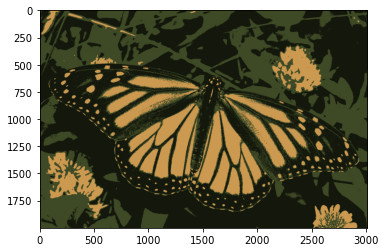

In [23]:
# reshape data into the original image dimensions
segmented_image = segmented_pixels.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)


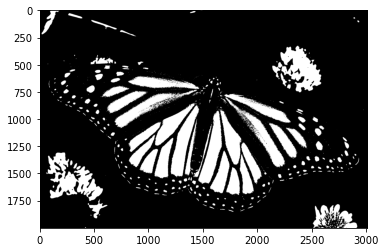

In [24]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==0, cmap='gray')

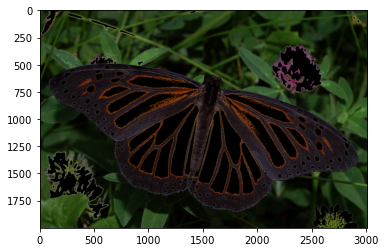

In [26]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
# masked_image[labels_reshape == cluster] = [0, 255, 0]
masked_image[labels_reshape == cluster] = [0, 0, 0]

plt.imshow(masked_image)

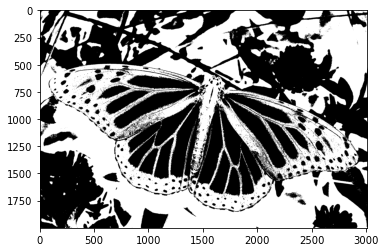

In [19]:
plt.imshow(labels_reshape==1, cmap='gray')

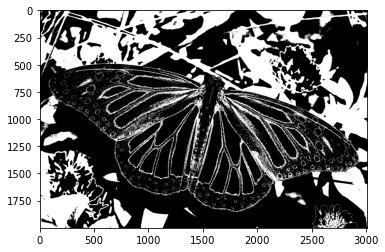

In [20]:
plt.imshow(labels_reshape==2, cmap='gray')

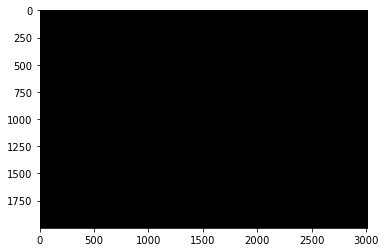

In [21]:
plt.imshow(labels_reshape==3, cmap='gray')